# Problem statement 1

In this assignment, students will be using the K-nearest neighbors
algorithm to predict how many points NBA players scored in the 2013-2014
season.

A look at the data

Before we dive into the algorithm, let’s take a look at our data. Each row in
the data contains information on how a player performed in the 2013-2014
NBA season.

Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

Here are some selected columns from the data:

player - name of the player

pos - the position of the player

g - number of games the player was in

gs - number of games the player started

pts - total points the player scored

There are many more columns in the data, mostly containing information
about average player game performance over the course of the season.
See this site for an explanation of the rest of them.
We can read our dataset in and figure out which columns are present:

In [1]:
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

In [2]:
with open("nba_2013.csv", 'r') as csvfile:
    nba = pandas.read_csv(csvfile)

In [3]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
nba.shape

(481, 31)

In [5]:
nba.nunique()

player          481
pos               7
age              21
bref_team_id     31
g                82
gs               80
mp              433
fg              296
fga             372
fg.             212
x3p             134
x3pa            221
x3p.            272
x2p             274
x2pa            339
x2p.            408
efg.            202
ft              203
fta             231
ft.             244
orb             155
drb             267
trb             302
ast             230
stl             120
blk              90
tov             180
pf              204
pts             379
season            1
season_end        1
dtype: int64

In [6]:
# printing column names
print(nba.columns.values)

['player' 'pos' 'age' 'bref_team_id' 'g' 'gs' 'mp' 'fg' 'fga' 'fg.' 'x3p'
 'x3pa' 'x3p.' 'x2p' 'x2pa' 'x2p.' 'efg.' 'ft' 'fta' 'ft.' 'orb' 'drb'
 'trb' 'ast' 'stl' 'blk' 'tov' 'pf' 'pts' 'season' 'season_end']


In [7]:
# checking for null values if any
nba.isnull().any()

player          False
pos             False
age             False
bref_team_id    False
g               False
gs              False
mp              False
fg              False
fga             False
fg.              True
x3p             False
x3pa            False
x3p.             True
x2p             False
x2pa            False
x2p.             True
efg.             True
ft              False
fta             False
ft.              True
orb             False
drb             False
trb             False
ast             False
stl             False
blk             False
tov             False
pf              False
pts             False
season          False
season_end      False
dtype: bool

In [8]:
nba["fg."].fillna(nba["fg."].mean(),inplace=True)
nba["x2p."].fillna(nba["x2p."].mean(),inplace=True)
nba["efg."].fillna(nba["efg."].mean(),inplace=True)
nba["x3p."].fillna(nba["x3p."].mean(),inplace=True)
nba["ft."].fillna(nba["ft."].mean(),inplace=True)

In [9]:
distance_columns = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 
                    'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 
                    'blk', 'tov', 'pf', 'pts']
nba_numeric = nba[distance_columns]

In [10]:
nba_normalized = nba_numeric.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [11]:
nba_category = nba[['player', 'bref_team_id', 'season']]

In [12]:
nba = pandas.concat([nba_category, nba_normalized], axis=1)

from sklearn.model_selection import train_test_split

# The columns that we will be making predictions with are numerical columns without points.
x_columns = nba[['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 
                 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']]

# The column that we want to predict.
y_column = nba["pts"]

x_train, x_test, y_train, y_test = train_test_split(x_columns, y_column, test_size=0.3, random_state=0)

In [13]:
for k in range(10):
    k_value = k + 1
    knn = KNeighborsRegressor(n_neighbors = k_value)
    knn.fit(x_train, y_train) 
    y_pred = knn.predict(x_test)
    print ("Regression score is:",format(metrics.r2_score(y_test, y_pred),'.4f'), "for k_value:", k_value)

Regression score is: 0.9145 for k_value: 1
Regression score is: 0.9464 for k_value: 2
Regression score is: 0.9548 for k_value: 3
Regression score is: 0.9594 for k_value: 4
Regression score is: 0.9583 for k_value: 5
Regression score is: 0.9579 for k_value: 6
Regression score is: 0.9579 for k_value: 7
Regression score is: 0.9609 for k_value: 8
Regression score is: 0.9576 for k_value: 9
Regression score is: 0.9557 for k_value: 10


In [14]:
knn = KNeighborsRegressor(n_neighbors = 8)
knn.fit(x_train, y_train) 
y_pred = knn.predict(x_test)
print ("Mean Squared Error is:", format(metrics.mean_squared_error(y_test, y_pred), '.7f'))
print ("Regression score is:", format(metrics.r2_score(y_test, y_pred),'.4f'))

Mean Squared Error is: 0.0011143
Regression score is: 0.9609


In this assignment students have to find the frequency of words in a webpage. User can use urllib and BeautifulSoup to extract text from webpage.

Hint:

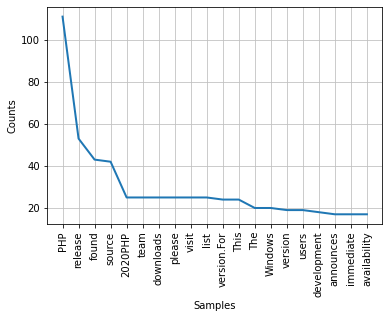

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [16]:
from bs4 import BeautifulSoup
import urllib.request
import nltk
from nltk.corpus import stopwords 

response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")
text = soup.get_text(strip=True)
stop = stopwords.words('english') 
tokens = [t for t in text.split()]
final = []
for token in tokens:
    if token not in stop:
        final.append(token)
freq = nltk.FreqDist(final)
freq.plot(20,cumulative=False)

n this assignment students have to compress racoon grey scale image into 5 clusters. In the end, visualize both raw and compressed image and look for quality difference.

The raw image is available in spicy.misc package with the name face.

Hint:

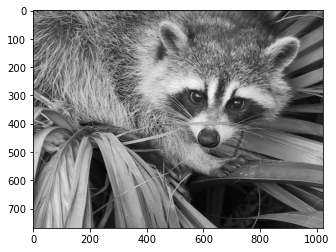

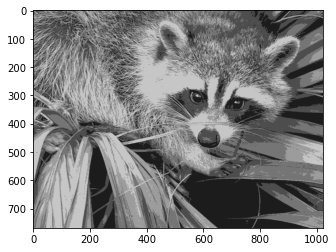

In [17]:
import numpy as np
from sklearn import cluster, datasets
from scipy import misc
import matplotlib.pyplot as plt
face = misc.face(gray=True)

clusters = 5
np.random.seed(100)

x = face.reshape((-1, 1))

kmeans = cluster.KMeans(n_clusters=clusters)

kmeans.fit(x)

values = kmeans.cluster_centers_.squeeze()
labels = kmeans.labels_

face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()

plt.figure(1)
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)

plt.figure(2)
plt.imshow(face_compressed, cmap=plt.cm.gray, vmin=vmin, vmax=vmax)

In this assignment students have to transform iris data into 3 dimensions and plot a 3d chart with transformed dimensions and colour each data point with specific class.

Hint:

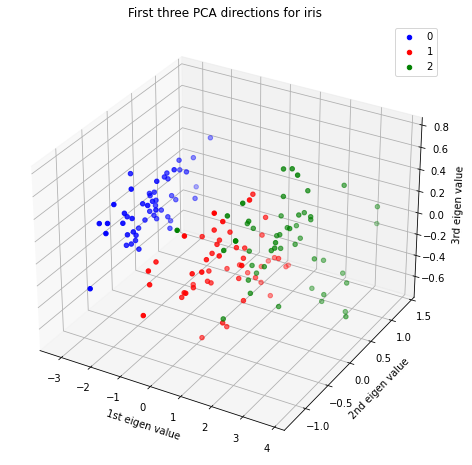

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
from sklearn.decomposition import PCA
iris = datasets.load_iris()
X = iris.data
Y = iris.target

Xreduced = PCA(n_components=3).fit_transform(X)
a, b = np.unique(Y,  return_counts=True)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xreduced[:50, 0], Xreduced[:50, 1], Xreduced[:50, 2], c='b', label='0')
ax.scatter(Xreduced[50:100, 0], Xreduced[50:100, 1], Xreduced[50:100, 2], c='r', label='1')
ax.scatter(Xreduced[100:150, 0], Xreduced[100:150, 1], Xreduced[100:150, 2], c='g', label='2')
plt.legend()
ax.set_xlabel('1st eigen value')
ax.set_ylabel('2nd eigen value')
ax.set_zlabel('3rd eigen value')
ax.set_title("First three PCA directions for iris")
plt.show()

In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value. Student can download data in .csv format from the following link:

https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

Hint:

predicted=349.117698, expected=342.300000
predicted=306.513018, expected=339.700000
predicted=387.376388, expected=440.400000
predicted=348.154169, expected=315.900000
predicted=386.308824, expected=439.300000
predicted=356.081993, expected=401.300000
predicted=446.379462, expected=437.400000
predicted=394.737280, expected=575.500000
predicted=434.915365, expected=407.600000
predicted=507.923393, expected=682.000000
predicted=435.482931, expected=475.300000
predicted=652.743811, expected=581.300000
predicted=546.343450, expected=646.900000
Test MSE: 6958.327


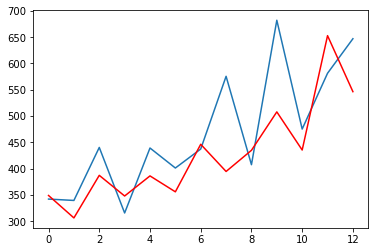

In [19]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast() 
    predictions.append(output[0])
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (output[0], obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()